In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re

print("Data 전처리 실행")
main_dir = 'C:/daegu_pop/preprocessing/' #경로지정
main_dir1 = 'C:/daegu_pop/' #경로지정|
f_list = glob.glob(os.path.join(main_dir,'2*'))# w전처리파일

# cmap = sns.cm.rocket_r#추가
cmap= "Reds"
# %%
years=[]

move_all=  pd.DataFrame()
move_age=  pd.DataFrame()
move_reason=  pd.DataFrame()
move_city=  pd.DataFrame()    
move_sido=  pd.DataFrame() 
in_all=  pd.DataFrame()
in_age=  pd.DataFrame()
in_reason=  pd.DataFrame()
in_city=  pd.DataFrame()    
in_sido=  pd.DataFrame() 
out_all=  pd.DataFrame()    
out_age=  pd.DataFrame()    
out_reason=  pd.DataFrame()    
out_city=  pd.DataFrame()    
out_sido=  pd.DataFrame() 
all_sido_move_1= pd.DataFrame()    
all_sido_move_2= pd.DataFrame()    
all_age_move= pd.DataFrame()    
all_reason_move= pd.DataFrame()    
all_sido_in= pd.DataFrame()    
all_age_in= pd.DataFrame()    
all_reason_in= pd.DataFrame()    
all_sido_out= pd.DataFrame()    
all_reason_out= pd.DataFrame()    
all_age_out= pd.DataFrame()    

for m,k in enumerate(f_list):  
    i= re.findall('[0-9]+', k)[0]
    print(f'{i}년도 Data 확인중...')
    globals()['pop_juso_{}'.format(i)] = pd.read_csv(f_list[m],encoding= 'cp949')
    globals()['pop_juso_{}'.format(i)].drop(columns ='Unnamed: 0',inplace =True)
    globals()['pop_juso_{}'.format(i)]["전입자_만나이"] =globals()['pop_juso_{}'.format(i)]["전입자_만나이"].replace({"0~4세":"00~4세"})
    years.append(int(i))




# %%

# %%
def make_df1(year):    
    #전입 전출  같은 도시 제외
    globals()['select_in{}'.format(year)] = globals()['pop_juso_{}'.format(year)][(globals()['pop_juso_{}'.format(year)]["전입시도"] == Select_City)]
    globals()['select_in{}'.format(year)] = globals()['select_in{}'.format(year)][(globals()['select_in{}'.format(year)]["전출시도"] != Select_City)]
    globals()['select_out{}'.format(year)]= globals()['pop_juso_{}'.format(year)][(globals()['pop_juso_{}'.format(year)]["전출시도"] == Select_City)]
    globals()['select_out{}'.format(year)]= globals()['select_out{}'.format(year)][(globals()['select_out{}'.format(year)]["전입시도"] != Select_City)] 
    
    select1 = globals()['pop_juso_{}'.format(year)]["전출시도"]== Select_City
    select2 = globals()['pop_juso_{}'.format(year)]["전입시도"] == Select_City
    globals()['select_inout{}'.format(year)] =globals()['pop_juso_{}'.format(year)][select1 | select2]
    select3 = globals()['select_inout{}'.format(year)]["전입시도"] != globals()['select_inout{}'.format(year)]["전출시도"]
    globals()['select_inout{}'.format(year)] =globals()['select_inout{}'.format(year)][select3]
    globals()['select_inout{}'.format(year)].reset_index() 
    
    # file = f'{year}_{Select_City}_타도시 이동데이터.csv'
    # juso_code = pd.read_excel(os.path.join(main_dir1, 'info', '2020_국내인구이동통계_파일설계서(코드집포함)(공공용).xlsx'),
    #             sheet_name= '행정구역코드 등록 및 말소 내역', skiprows=3)
    # abcd= juso_code.iloc[:,1].unique()
    # if select_year != "전체기간":
    #     if os.path.isfile(file):
    #         print(f"{year}년도 {Select_City}_csv는 이전에 생성되었습니다.'")
    #     else:    
    #         if (Select_City in abcd):
    #             print(f"{year}년도 csv 생성중'")
                # globals()['select_inout{}'.format(year)].to_csv(f'./결과저장/{year}_{Select_City}_시도간 이동데이터.csv',encoding= 'cp949')  
    #         else:
    #             print("잘못된 값")
    # else:
    #     print(f'{year} Data 확인중...')


# %%
def make_df2():
    #초기화
    globals()['move_all']= pd.DataFrame()
    globals()['move_age']= pd.DataFrame()
    globals()['move_reason']= pd.DataFrame()
    globals()['move_city']= pd.DataFrame()
    globals()['move_sido']= pd.DataFrame()
    globals()['in_all']= pd.DataFrame()
    globals()['in_age']= pd.DataFrame()
    globals()['in_reason']= pd.DataFrame()
    globals()['in_city']= pd.DataFrame()
    globals()['in_sido']= pd.DataFrame()
    globals()['out_all']= pd.DataFrame()    
    globals()['out_age']= pd.DataFrame()    
    globals()['out_reason']= pd.DataFrame()    
    globals()['out_city']= pd.DataFrame()    
    globals()['out_sido']= pd.DataFrame()  
    

    for year in years:
        make_df1(year)
        #대구시 전입(대구in)- 대구시전출데이터의 전출(대구out)== 순유출
        abcd =globals()['select_in{}'.format(year)].groupby(["전입시도"]).size()
        efg= globals()['select_out{}'.format(year)].groupby(["전출시도"]).size()
        move_s= (abcd - efg) *-1
        
        globals()['move_all']= pd.concat([globals()['move_all'],move_s],axis=1)
        globals()['in_all'] = pd.concat([globals()['in_all'],abcd],axis=1)
        globals()['out_all']= pd.concat([globals()['out_all'],efg],axis=1)    
        # in_city -대구에서 어디로 나갓는지/ out 어디서 대구로 들어왓는지
        in_a = globals()['select_in{}'.format(year)].groupby(["전출시도"]).size()
        out_a = globals()['select_out{}'.format(year)].groupby(["전입시도"]).size()
        aaa= (in_a - out_a) *-1
        globals()['move_city']= pd.concat([ globals()['move_city'],aaa],axis=1)
        globals()['in_city']= pd.concat([globals()['in_city'],in_a],axis=1)
        globals()['out_city']= pd.concat([globals()['out_city'],out_a],axis=1)    

        in_b=globals()['select_in{}'.format(year)].groupby(["사유"]).size()
        out_b=globals()['select_out{}'.format(year)].groupby(["사유"]).size()
        bbb= (in_b-out_b) *-1
        globals()['move_reason']= pd.concat([ globals()['move_reason'],bbb],axis=1)    
        globals()['in_reason']= pd.concat([globals()['in_reason'],in_b],axis=1)    
        globals()['out_reason']= pd.concat([globals()['out_reason'],out_b],axis=1)        

        in_c = globals()['select_in{}'.format(year)].groupby(["전입자_만나이"]).size()
        out_c = globals()['select_out{}'.format(year)].groupby(["전입자_만나이"]).size()
        ccc= (in_c-out_c) *-1
        globals()['move_age']= pd.concat([globals()['move_age'], ccc],axis=1)
        globals()['in_age']= pd.concat([globals()['in_age'], in_c],axis=1)
        globals()['out_age']= pd.concat([globals()['out_age'], out_c],axis=1)

        abcd =globals()['select_in{}'.format(year)].groupby(["전입시군구"]).size()
        efg= globals()['select_out{}'.format(year)].groupby(["전출시군구"]).size()
        move_s= (abcd - efg) *-1
        globals()['move_sido']= pd.concat([globals()['move_sido'],move_s],axis=1)
        globals()['in_sido'] = pd.concat([globals()['in_sido'],abcd],axis=1)
        globals()['out_sido']= pd.concat([globals()['out_sido'],efg],axis=1)    
        
    
    blank = pd.DataFrame()
    blank[0]=[years]
    blank = pd.DataFrame()
    for i,year in enumerate(years):
        blank[0,i]=[year]
    blank.columns= years
    blank.rename(index={0: '-----'},inplace=True)
        
    blank.columns=[years]
    in_all.columns=[years]
    in_city.columns=[years]
    in_reason.columns=[years]
    in_age.columns=[years]
    
    # csv_make= input("전입/전출/순유출 요약 csv 파일을 다운받으시겠습니까?   [예  - 입력시 CSV 파일 생성 / 원하지 않을 시 아무 키나 입력]")
    # if csv_make == "예":
    in_csv = pd.concat([in_all,blank])
    in_csv = pd.concat([in_csv,in_reason])
    in_csv = pd.concat([in_csv,blank])
    in_csv = pd.concat([in_csv,in_city])
    in_csv = pd.concat([in_csv,blank])
    in_csv = pd.concat([in_csv,in_age])
    # in_csv.to_csv(f"./결과저장/{len(years)}개년_{Select_City}_전입 요약.csv",encoding= 'cp949')  

    out_all.columns=[years]
    out_city.columns=[years]
    out_reason.columns=[years]
    out_age.columns=[years]

    out_csv = pd.concat([out_all,blank])
    out_csv = pd.concat([out_csv,out_reason])
    out_csv = pd.concat([out_csv,blank])
    out_csv = pd.concat([out_csv,out_city])
    out_csv = pd.concat([out_csv,blank])
    out_csv = pd.concat([out_csv,out_age])
    # out_csv.to_csv(f"./결과저장/{len(years)}개년_{Select_City}_전출 요약.csv",encoding= 'cp949')  

    move_all.columns=[years]
    move_city.columns=[years]
    move_reason.columns=[years]
    move_age.columns=[years]

    move_csv = pd.concat([move_all,blank])
    move_csv = pd.concat([move_csv,move_reason])
    move_csv = pd.concat([move_csv,blank])
    move_csv = pd.concat([move_csv,move_city])
    move_csv = pd.concat([move_csv,blank])
    move_csv = pd.concat([move_csv,move_age])
    # move_csv.to_csv(f"./결과저장/{len(years)}개년_{Select_City}_순유출 요약.csv",encoding= 'cp949')  
    


# %%
def go_to_city_year(Select_City,전출도시,year):
    globals()[f'{전출도시}_to_{Select_City}'] = globals()['pop_juso_{}'.format(year)][(globals()['pop_juso_{}'.format(year)]["전입시도"] == Select_City)]
    globals()[f'{전출도시}_to_{Select_City}'] = globals()[f'{전출도시}_to_{Select_City}'][(globals()[f'{전출도시}_to_{Select_City}']["전출시도"] == 전출도시)]

def go_to_city_all(select,전출도시):
    globals()['all_sido_in']= pd.DataFrame()    
    globals()['all_sido_out']= pd.DataFrame()  
    globals()['all_sido_move_1']= pd.DataFrame()  
    globals()['all_sido_move_2'] = pd.DataFrame()  

    globals()['all_reason_move'] = pd.DataFrame()  
    globals()['all_reason_in'] = pd.DataFrame()  
    globals()['all_reason_out'] = pd.DataFrame()  
    globals()['all_age_move'] = pd.DataFrame()  
    globals()['all_age_in'] = pd.DataFrame()  
    globals()['all_age_out'] = pd.DataFrame()  
    globals()['도시비교_순유출'] =pd.DataFrame()  
    globals()['도시비교_유입'] =pd.DataFrame()  
    globals()['도시비교_유출'] =pd.DataFrame()  
    for year in years:
    #변수 만들기    
        go_to_city_year(select,전출도시,year)
        go_to_city_year(전출도시,select,year)
    #전입
        ㅇㅇ=globals()[f'{전출도시}_to_{select}'].groupby(globals()[f'{전출도시}_to_{select}']["전입시군구"]).size() 
        globals()['all_sido_in']= pd.concat([globals()['all_sido_in'], ㅇㅇ],axis=1)
        
        ㅇㅇ=globals()[f'{전출도시}_to_{select}'].groupby(globals()[f'{전출도시}_to_{select}']["사유"]).size() 
        globals()['all_reason_in']= pd.concat([globals()['all_reason_in'], ㅇㅇ],axis=1)
        
        ㅇㅇ=globals()[f'{전출도시}_to_{select}'].groupby(globals()[f'{전출도시}_to_{select}']["전입자_만나이"]).size() 
        globals()['all_age_in']= pd.concat([globals()['all_age_in'], ㅇㅇ],axis=1)
        a = globals()[f'{전출도시}_to_{select}']
        aab22b순유출 = a.groupby(a["전입시도"]).size() 
        globals()['도시비교_유입']= pd.concat([globals()['도시비교_유입'], aab22b순유출],axis=1)
        
    #전출
        b = globals()[f'{select}_to_{전출도시}']
        a232abb순유출 = b.groupby(b["전출시도"]).size() 
        globals()['도시비교_유출']= pd.concat([globals()['도시비교_유출'], a232abb순유출],axis=1)
        
        ㄴㄴ=globals()[f'{select}_to_{전출도시}'].groupby(globals()[f'{select}_to_{전출도시}']["전출시군구"]).size() 
        globals()['all_sido_out']= pd.concat([globals()['all_sido_out'], ㄴㄴ],axis=1)
        
        ㅇㅇ=globals()[f'{select}_to_{전출도시}'].groupby(globals()[f'{select}_to_{전출도시}']["사유"]).size() 
        globals()['all_reason_out']= pd.concat([globals()['all_reason_out'], ㅇㅇ],axis=1)
        
        ㅇㅇ=globals()[f'{select}_to_{전출도시}'].groupby(globals()[f'{select}_to_{전출도시}']["전입자_만나이"]).size() 
        globals()['all_age_out']= pd.concat([globals()['all_age_out'], ㅇㅇ],axis=1)
        
    #순유출
        a = globals()[f'{전출도시}_to_{select}']
        b = globals()[f'{select}_to_{전출도시}']
    

        aabb순유출 = (a.groupby(a["전입시도"]).size() - b.groupby(b["전출시도"]).size())*-1
        globals()['도시비교_순유출']= pd.concat([globals()['도시비교_순유출'], aabb순유출],axis=1)

        aa_순유출 = (a.groupby(a["전입시군구"]).size() - b.groupby(b["전출시군구"]).size())*-1
        bb_순유출 = (b.groupby(b["전입시군구"]).size() - a.groupby(a["전출시군구"]).size())*-1
        #
        globals()['all_sido_move_1']= pd.concat([globals()['all_sido_move_1'], aa_순유출],axis=1)
        globals()['all_sido_move_2']= pd.concat([globals()['all_sido_move_2'], bb_순유출],axis=1)


        aa_이유순유출 = (a.groupby(a["사유"]).size() - b.groupby(b["사유"]).size()) *-1
        globals()['all_reason_move']= pd.concat([globals()['all_reason_move'], aa_이유순유출],axis=1)

        aa나이_순유출 = (a.groupby(a["전입자_만나이"]).size() - b.groupby(b["전입자_만나이"]).size())*-1
        globals()['all_age_move']= pd.concat([globals()['all_age_move'], aa나이_순유출],axis=1)

def in_graph(select_year):
    
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    globals()['select_in{}'.format(select_year)].groupby(globals()['select_in{}'.format(select_year)]["전출시도"]).size().plot.bar(plt.figure(figsize=(15,12))) 
    plt.title(f'{select_year}_{Select_City}_유입 도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_유입 도시')
    plt.close()
    
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 6}
    globals()['select_in{}'.format(select_year)].groupby(globals()['select_in{}'.format(select_year)]["사유"]).size().plot.pie(figsize=(15,12), autopct= '%0.1f%%',wedgeprops=wedgeprops)
    plt.title(f' {select_year}_{Select_City}_유입_사유',fontsize=20)
    plt.ylabel("")
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유입_사유')
    plt.close()
    
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    globals()['select_in{}'.format(select_year)].groupby(globals()['select_in{}'.format(select_year)]["전입자_만나이"]).size().plot.barh(plt.figure(figsize=(15,12))) 
    plt.title(f'{select_year}_{Select_City}_유입_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_유입_연령')
    plt.close()
    

def in_graph_reason(select_year,사유선택):

    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    a = globals()['select_in{}'.format(select_year)][globals()['select_in{}'.format(select_year)]["사유"]==사유선택]
    a.groupby(["전출시도"]).size().plot.bar(figsize=(15,12))
    plt.title(f' {select_year}_{Select_City}_유입_{사유선택}사유_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유입_{사유선택}_도시')
    plt.close()
    
    plt.figure(figsize=(15,12))
    a.groupby(["전입자_만나이"]).size().plot.barh(figsize=(15,12))
    plt.title(f' {select_year}_{Select_City}_유입_{사유선택}_사유_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유입_{사유선택}_연령')
    plt.close()
    

def in_graph_age(select_year,연령대_선택):
    a = globals()['select_in{}'.format(select_year)][globals()['select_in{}'.format(select_year)]["전입자_만나이"]==연령대_선택]
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 6}
    a.groupby(["사유"]).size().plot.pie(figsize=(15,12), autopct= '%0.1f%%',wedgeprops=wedgeprops)
    plt.ylabel("")
    plt.title(f' {select_year}_{Select_City}_유입_{연령대_선택}_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유입_{연령대_선택}_사유')
    plt.close()
    
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    a.groupby(["전출시도"]).size().plot.bar()
    plt.title(f' {select_year}_{Select_City}_유입_{연령대_선택}_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유입_{연령대_선택}_도시')
    plt.close()
    

def in_graph_city(select_year, 도시선택):
    a = globals()['select_in{}'.format(select_year)][globals()['select_in{}'.format(select_year)]["전출시도"]==도시선택]
    plt.figure(figsize=(15,12))
    a.groupby(["전입자_만나이"]).size().plot.barh(figsize=(15,12))
    plt.title(f'{select_year}_{Select_City} 유입_{도시선택}_유출_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City} 유입_{도시선택}_유출_연령')
    plt.close()
    
    wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 6}
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    a.groupby(["사유"]).size().plot.pie(figsize=(15,12), autopct= '%0.1f%%',wedgeprops=wedgeprops)
    plt.ylabel("")
    plt.title(f'{select_year}_{Select_City}_유입_{도시선택}_유출_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_유입_{도시선택}_유출_사유')
    plt.close()
    
    plt.figure(figsize=(15,12))
    abcd =a.groupby(["전입시군구"]).size()
    abcd.plot.barh(figsize=(15,12))
    plt.title(f' {select_year}_{Select_City}_유입 {도시선택}_유출_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유입 {도시선택}_유출_시군구')    
    plt.close()


def out_graph(select_year):
    
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    globals()['select_out{}'.format(select_year)].groupby(globals()['select_out{}'.format(select_year)]["전입시도"]).size().plot.bar(plt.figure(figsize=(15,12))) 
    plt.title(f'{select_year}_{Select_City}_유출 도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_유출 도시')
    plt.close()
    
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 6}
    globals()['select_out{}'.format(select_year)].groupby(globals()['select_out{}'.format(select_year)]["사유"]).size().plot.pie(figsize=(15,12), autopct= '%0.1f%%',wedgeprops=wedgeprops)
    plt.title(f' {select_year}_{Select_City}_유출_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    plt.ylabel("")
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유출_사유')
    plt.close()
    
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    globals()['select_out{}'.format(select_year)].groupby(globals()['select_out{}'.format(select_year)]["전입자_만나이"]).size().plot.barh(plt.figure(figsize=(15,12))) 
    plt.title(f'{select_year}_{Select_City}_유출_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_유출_연령')
    plt.close()
    

def out_graph_reason(select_year,사유선택):

    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    a = globals()['select_out{}'.format(select_year)][globals()['select_out{}'.format(select_year)]["사유"]==사유선택]
    a.groupby(["전입시도"]).size().plot.bar(figsize=(15,12))
    plt.title(f' {select_year}_{Select_City}_유출_{사유선택}사유_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유출_{사유선택}_도시')
    plt.close()
    
    plt.figure(figsize=(15,12))
    a.groupby(["전입자_만나이"]).size().plot.barh(figsize=(15,12))
    plt.title(f' {select_year}_{Select_City}_유출_{사유선택}_사유_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유출_{사유선택}_연령')
    plt.close()
    

def out_graph_age(select_year,연령대_선택):
    a = globals()['select_out{}'.format(select_year)][globals()['select_out{}'.format(select_year)]["전입자_만나이"]==연령대_선택]
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 6}
    a.groupby(["사유"]).size().plot.pie(figsize=(15,12), autopct= '%0.1f%%',wedgeprops=wedgeprops)
    plt.ylabel("")
    plt.title(f' {select_year}_{Select_City}_유출_{연령대_선택}_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유출_{연령대_선택}_사유')
    plt.close()
    
    plt.figure(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    a.groupby(["전입시도"]).size().plot.bar()
    plt.title(f' {select_year}_{Select_City}_유출_{연령대_선택}_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유출_{연령대_선택}_도시')
    plt.close()
    

def out_graph_city(select_year, 도시선택):
    a = globals()['select_out{}'.format(select_year)][globals()['select_out{}'.format(select_year)]["전입시도"]==도시선택]
    plt.figure(figsize=(15,12))
    a.groupby(["전입자_만나이"]).size().plot.barh(figsize=(15,12))
    plt.rc('font', family='Malgun Gothic',size= 20) 
    plt.title(f'{select_year}_{Select_City} 유출_{도시선택}_유출_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City} 유출_{도시선택}_유입_연령')
    plt.close()
    
    
    wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 6}
    plt.figure(figsize=(15,12))
    a.groupby(["사유"]).size().plot.pie(figsize=(15,12), autopct= '%0.1f%%',wedgeprops=wedgeprops)
    plt.ylabel("")
    plt.title(f'{select_year}_{Select_City}_유출_{도시선택}_유출_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_유출_{도시선택}_유입_사유')
    plt.close()
    
    
    abcd =a.groupby(["전출시군구"]).size()
    plt.figure(figsize=(15,12))
    abcd.plot.barh(figsize=(15,12))
    plt.title(f' {select_year}_{Select_City}_유출 {도시선택}_유입_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_유출 {도시선택}_유입_시군구')
    plt.close()
    

def move_graph(select_year):
    plt.rcParams['axes.unicode_minus'] = False
    wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 6}
    
    in_a = globals()['select_in{}'.format(select_year)].groupby(globals()['select_in{}'.format(select_year)]["전출시도"]).size()
    out_a = globals()['select_out{}'.format(select_year)].groupby(globals()['select_out{}'.format(select_year)]["전입시도"]).size()
    aaa= in_a - out_a

    in_b=globals()['select_in{}'.format(select_year)].groupby(globals()['select_in{}'.format(select_year)]["사유"]).size()
    out_b=globals()['select_out{}'.format(select_year)].groupby(globals()['select_out{}'.format(select_year)]["사유"]).size()
    bbb= in_b-out_b

    in_c = globals()['select_in{}'.format(select_year)].groupby(globals()['select_in{}'.format(select_year)]["전입자_만나이"]).size()
    out_c = globals()['select_out{}'.format(select_year)].groupby(globals()['select_out{}'.format(select_year)]["전입자_만나이"]).size()
    ccc= in_c-out_c

    plt.figure(figsize=(15,12))
    aaa.plot.bar()
    plt.title(f'{select_year}_{Select_City}_순유출_도시 ',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_순유출_도시 ')
    plt.close()
    

    plt.figure(figsize=(15,12))
    bbb.plot.bar()
    plt.title(f'{select_year}_{Select_City}_순유출_사유 ',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_순유출_사유 ')
    plt.close()
    
    
    plt.figure(figsize=(15,12))
    ccc.plot.bar()
    plt.title(f'{select_year}_{Select_City}_순유출_연령 ',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{select_year}_{Select_City}_순유출_연령 ')
    plt.close()
    
    
def move_graph_age(select_year,연령대_선택):
    plt.rcParams['axes.unicode_minus'] = False
    in_a = globals()['select_in{}'.format(select_year)][globals()['select_in{}'.format(select_year)]["전입자_만나이"]==연령대_선택]
    out_a = globals()['select_out{}'.format(select_year)][globals()['select_out{}'.format(select_year)]["전입자_만나이"]==연령대_선택]
    
    bbb=(in_a.groupby(["사유"]).size()-out_a.groupby(["사유"]).size()) * -1
    plt.figure(figsize=(15,12))
    plt.title(f' {select_year}_{Select_City}_순유출_{연령대_선택}_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    bbb.plot.bar()
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_순유출_{연령대_선택}_사유')
    plt.close()
    
    
    aaa= (in_a.groupby(["전출시도"]).size()- out_a.groupby(["전입시도"]).size()) * -1
    plt.figure(figsize=(15,12))
    aaa.plot.bar()
    plt.title(f' {select_year}_{Select_City}_순유출_{연령대_선택}_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_순유출_{연령대_선택}_도시')
    plt.close()
    
    

def move_graph_city(select_year, 도시선택):
    in_a = globals()['select_in{}'.format(select_year)][globals()['select_in{}'.format(select_year)]["전출시도"]==도시선택]
    out_a = globals()['select_out{}'.format(select_year)][globals()['select_out{}'.format(select_year)]["전입시도"]==도시선택]
    
    aaa= (in_a.groupby(["전입자_만나이"]).size()- out_a.groupby(["전입자_만나이"]).size())* -1
    
    plt.figure(figsize=(15,12))
    aaa.plot.bar()
    plt.title(f' {select_year}_{Select_City}_순유출_{도시선택}_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_순유출_{도시선택}_연령')
    plt.close()
    
    
    bbb=(in_a.groupby(["사유"]).size()-out_a.groupby(["사유"]).size())* -1
    plt.figure(figsize=(15,12))
    bbb.plot.bar()
    plt.title(f' {select_year}_{Select_City}_순유출_{도시선택}_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_순유출_{도시선택}_사유')
    plt.close()
    

    abcd =in_a.groupby(["전입시군구"]).size()
    efg= out_a.groupby(["전출시군구"]).size()
    move_s= (abcd - efg)*-1    
    plt.figure(figsize=(15,12))
    move_s.plot.bar(figsize=(15,12))
    plt.title(f' {select_year}_{Select_City}_순유출_{도시선택}_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_순유출_{도시선택}_시군구')
    plt.close()
    
    
def move_graph_reason(select_year,사유선택):
    in_a = globals()['select_in{}'.format(select_year)][globals()['select_in{}'.format(select_year)]["사유"]==사유선택]
    out_a = globals()['select_out{}'.format(select_year)][globals()['select_out{}'.format(select_year)]["사유"]==사유선택]
    
    aaa= (in_a.groupby(["전출시도"]).size()- out_a.groupby(["전입시도"]).size())* -1
    plt.figure(figsize=(15,12))
    aaa.plot.bar()
    plt.title(f' {select_year}_{Select_City}_순유출_{사유선택}_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_순유출_{사유선택}_도시')
    plt.close()
    
    
    bbb=(in_a.groupby(["전입자_만나이"]).size()-out_a.groupby(["전입자_만나이"]).size())* -1
    plt.figure(figsize=(15,12))
    bbb.plot.bar()
    plt.title(f' {select_year}_{Select_City}_순유출_{사유선택}_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/ {select_year}_{Select_City}_순유출_{사유선택}_연령')
    plt.close()
    

# %% [markdown]
# # 전체 그래프

# %%
# 전입 
def all_in_graph():
    in_all.columns=[years]
    in_age.columns=[years]
    in_reason.columns=[years]
    in_city.columns=[years]
    in_sido.columns=[years]
    in_all_ = in_all.T
    in_reason_= in_reason.T
    
    plt.rcParams['figure.figsize'] = [15,12]
    plt.rc('font',family='Malgun Gothic', size=12)   #기본글자크기
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(15,12))
    in_all_.plot(marker="o")
    plt.title(f'{len(years)}개년_{Select_City}_유입',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유입')
    plt.close()
    
    plt.figure(figsize=(15,12))
    sns.heatmap(in_age, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_유입_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유입_연령')
    plt.close()
    
    plt.figure(figsize=(15,12))

    in_reason_.plot(marker="o")
    plt.title(f'{len(years)}개년_{Select_City}_유입_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유입_사유')
    plt.close()
    
    plt.figure(figsize=(15,12))
    sns.heatmap(in_city, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_유입_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유입_도시')
    plt.close()
    
    plt.figure(figsize=(15,12))
    sns.heatmap(in_sido, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_유입_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유입_시군구')
    plt.close()
    


# %%
#전출
def all_out_graph():

    out_all.columns=[years]
    out_age.columns=[years]
    out_reason.columns=[years]
    out_city.columns=[years]
    out_sido.columns=[years]
    out_all_= out_all.T
    out_reason_= out_reason.T

    plt.rcParams['figure.figsize'] =  [15,12]
    plt.rc('font',family='Malgun Gothic', size=12)   #기본글자크기
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(15,12))
    out_all_.plot(marker="o")
    plt.title(f'{len(years)}개년_{Select_City}_유출',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유출')
    plt.close()
    

    plt.figure(figsize=(15,12))
    sns.heatmap(out_age, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_유출_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유출_연령')
    plt.close()
    

    plt.figure(figsize=(15,12))
    out_reason_.plot(marker="o")
    plt.title(f'{len(years)}개년_{Select_City}_유출_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유출_사유')
    plt.close()
    

    plt.figure(figsize=(15,12))
    sns.heatmap(out_city, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_유출_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유출_도시')
    plt.close()
    

    plt.figure(figsize=(15,12))
    sns.heatmap(out_sido, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_유출_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_유출_시군구')
    plt.close()
    


# %%
def all_move_graph():
    move_all.columns=[years]
    move_age.columns=[years]
    move_reason.columns=[years]
    move_city.columns=[years]
    move_sido.columns=[years]
    move_all_= move_all.T
    move_reason_= move_reason.T  

    plt.figure(figsize=(15,12))
    plt.rc('font', size=10)   #기본글자크기
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['figure.figsize'] =  [15,12]
    
    plt.figure(figsize=(15,12))
    move_all_.plot(marker="o")
    plt.title(f'{len(years)}개년_{Select_City}_순유출',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_순유출')
    plt.close()
    

    plt.figure(figsize=(15,12))
    sns.heatmap(move_age, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_순유출_연령',fontsize=20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_순유출_연령')
    plt.close()
    

    plt.figure(figsize=(15,12))
    move_reason_.plot(marker="o")
    plt.title(f'{len(years)}개년_{Select_City}_순유출_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_순유출_사유')
    plt.close()
    

    plt.figure(figsize=(15,12))
    sns.heatmap(move_city, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_순유출_도시',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_순유출_도시')
    plt.close()
    
    plt.figure(figsize=(15,12))
    sns.heatmap(move_sido, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{Select_City}_순유출_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{Select_City}_순유출_시군구')
    plt.close()
    


# %%
def g_a_move_b(select,비교도시,year):
    go_to_city_year(select,비교도시,year)
    go_to_city_year(비교도시,select,year)
    
    sido_in=globals()[f'{비교도시}_to_{Select_City}'].groupby(globals()[f'{비교도시}_to_{select}']["전입시군구"]).size() 
    sido_out=globals()[f'{select}_to_{비교도시}'].groupby(globals()[f'{select}_to_{비교도시}']["전입시군구"]).size() 
    sido_move = (sido_in -sido_out)*-1
    
    plt.rcParams['figure.figsize'] =  [15,12]
    plt.rc('font',family='Malgun Gothic', size=12)   #기본글자크기
    plt.rcParams['axes.unicode_minus'] = False

    유입 =globals()[f'{비교도시}_to_{Select_City}'].groupby(globals()[f'{비교도시}_to_{select}']["전출시군구"]).size() 
    plt.figure(figsize=(15,12))
    유입.plot.bar()
    plt.title(f'{year}_{select}유입_{비교도시}_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{year}_{select}유입_{비교도시}_시군구')
    plt.close()
    

    유출 = globals()[f'{select}_to_{비교도시}'].groupby(globals()[f'{select}_to_{비교도시}']["전입시군구"]).size()
    plt.figure(figsize=(15,12))
    유출.plot.bar()
    plt.title(f'{year}_{select}유출_{비교도시}_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{year}_{select}유출_{비교도시}_시군구')
    plt.close()
    
# -1 곱함
    c_순유출 =(globals()[f'{비교도시}_to_{Select_City}'].groupby(globals()[f'{비교도시}_to_{Select_City}']["전출시군구"]).size() - globals()[f'{select}_to_{비교도시}'].groupby(globals()[f'{select}_to_{비교도시}']["전입시군구"]).size())*-1
    plt.figure(figsize=(15,12))
    c_순유출.plot.bar()
    plt.title(f'{year}_{select}순유출_{비교도시}_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{year}_{select}순유출_{비교도시}_시군구')
    plt.close()
    


# %%

def g_a_out_b_all(select,b):
    도시비교_유출.columns=[years]
    도시비교_유출_=도시비교_유출.T
    all_age_out.columns=[years]
    all_reason_out.columns=[years]
    all_reason_out_= all_reason_out.T
    all_sido_out.columns=[years]
    all_sido_out_=all_sido_out.T

    plt.rcParams['figure.figsize'] = [15,12]
    plt.rc('font',family='Malgun Gothic', size=12)   #기본글자크기
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(15,12))
    도시비교_유출_.plot()
    plt.title(f'{len(years)}개년_{b}유입_{select}유출',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{b}유입_{select}유출')
    plt.close()
    

    plt.figure(figsize=(15,12))
    sns.heatmap(all_sido_out, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{b}유입_{select}유출_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{b}유입_{select}유출_시군구')
    plt.close()
    

    plt.figure(figsize=(15,12))
    all_reason_out_.plot()
    plt.title(f'{len(years)}개년_{b}유입_{select}유출_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{b}유입_{select}유출_사유')
    plt.close()
    

    plt.figure(figsize=(15,12))
    sns.heatmap(all_age_out, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{b}유입_{select}유출_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{b}유입_{select}유출_연령')
    plt.close()
    
    
    blank = pd.DataFrame()
    for i,year in enumerate(years):
        blank[0,i]=[year]
    blank.columns= [years]
    blank.rename(index={0: '-----'},inplace=True)
    
    out_sido_csv = pd.concat([도시비교_유출,blank])
    out_sido_csv = pd.concat([out_sido_csv,all_sido_out])
    # out_sido_csv = pd.concat([out_sido_csv,blank])
    # out_sido_csv = pd.concat([out_sido_csv,all_sido_out * -1])
    out_sido_csv = pd.concat([out_sido_csv,blank])
    out_sido_csv = pd.concat([out_sido_csv,  all_reason_out])
    out_sido_csv = pd.concat([out_sido_csv,blank])
    out_sido_csv = pd.concat([out_sido_csv,  all_age_out])
    # out_sido_csv.to_csv(f"./결과저장/{len(years)}개년_{Select_City}_{b}_유출 요약.csv",encoding= 'cp949')  
    
def g_a_in_b_all(select,b):
    도시비교_유입.columns=[years]
    도시비교_유입_=도시비교_유입.T
    all_age_in.columns=[years]

    all_reason_in.columns=[years]
    all_reason_in_= all_reason_in.T
    plt.rcParams['figure.figsize'] = [15,12]
    plt.rc('font',family='Malgun Gothic', size=12)   #기본글자크기
    plt.rcParams['axes.unicode_minus'] = False
    all_sido_in.columns=[years]
    all_sido_in_=all_sido_in.T

    plt.figure(figsize=(15,12))
    도시비교_유입_.plot(marker="o")
    plt.title(f'{len(years)}개년_{b}유출_{select} 유입',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{b}유출_{select} 유입')
    plt.close()
    
#####추가!!!!!    plt.figure(figsize=(15,12))
    plt.figure(figsize=(15,12))
    sns.heatmap(all_sido_in, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{b}유출_{select}유입_시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{b}유출_{select}유입_시군구')
    plt.close()
    
    plt.figure(figsize=(15,12))
    all_reason_in_.plot()
    plt.title(f'{len(years)}개년_{b}유출_{select} 유입_ 사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{b}유출_{select} 유입_ 사유')
    plt.close()
    
    plt.figure(figsize=(15,12))
    sns.heatmap(all_age_in, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{b}유출_{select} 유입_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{b}유출_{select} 유입_연령')
    plt.close()
    


    blank = pd.DataFrame()
    for i,year in enumerate(years):
        blank[0,i]=[year]
    blank.columns= [years]
    blank.rename(index={0: '-----'},inplace=True)
    in_sido_csv = pd.concat([도시비교_유입,blank])
    in_sido_csv = pd.concat([in_sido_csv,all_sido_in])
    # in_sido_csv = pd.concat([in_sido_csv,blank])
    # in_sido_csv = pd.concat([in_sido_csv,all_sido_in * -1])
    in_sido_csv = pd.concat([in_sido_csv,blank])
    in_sido_csv = pd.concat([in_sido_csv,  all_reason_in])
    in_sido_csv = pd.concat([in_sido_csv,blank])
    in_sido_csv = pd.concat([in_sido_csv,  all_age_in])
    # in_sido_csv.to_csv(f"./결과저장/{len(years)}개년_{Select_City}_{b}_유입 요약.csv",encoding= 'cp949')  


# %%
def g_a_move_b_all(select,비교도시):
    
    all_sido_move_1.columns=[years]
    all_sido_move_2.columns=[years]
    all_reason_move.columns=[years]
    all_age_move.columns=[years]
    
    도시비교_순유출.columns=[years]
    all_sido_move_1_= all_sido_move_1.T
    all_sido_move_2_= all_sido_move_2.T 
    all_reason_move_= all_reason_move.T
    all_age_move_= all_age_move.T
    도시비교_순유출_=도시비교_순유출.T

    plt.rcParams['figure.figsize'] =  [15,12]
    plt.rc('font',family='Malgun Gothic', size=12)   #기본글자크기
    plt.rcParams['axes.unicode_minus'] = False

    plt.figure(figsize=(15,12))
    도시비교_순유출_.plot(marker="o")
    plt.title(f'{len(years)}개년_{select}_{비교도시}_순유출',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{select}_{비교도시}_순유출')
    plt.close()
    
    plt.figure(figsize=(15,12))
    sns.heatmap(all_sido_move_1, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{select}_{비교도시}_순유출_{select}시군구',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{select}_{비교도시}_순유출_{select}시군구')
    plt.close()
    
    plt.figure(figsize=(15,12))
    sns.heatmap(all_sido_move_2 * -1, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{select}_{비교도시}_순유출_{비교도시}시군구 ',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{select}_{비교도시}_순유출_{비교도시}시군구')
    plt.close()
        
    
    plt.figure(figsize=(15,12))
    plt.rcParams['figure.figsize'] =  [15,12]
    all_reason_move_.plot()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'{len(years)}개년_{select}_{비교도시} _순유출_사유',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{select}_{비교도시} _순유출_사유')
    plt.close()
    

    plt.figure(figsize=(15,12))
    sns.heatmap(all_age_move, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
    plt.title(f'{len(years)}개년_{select}_ {비교도시}_순유출_연령',fontsize=20)
    plt.gcf().subplots_adjust(bottom=0.20)
    #plt.savefig(f'./결과저장/{len(years)}개년_{select}_ {비교도시}_순유출_연령')
    plt.close()
    
    
    blank = pd.DataFrame()
    for i,year in enumerate(years):
        blank[0,i]=[year]
    blank.columns= [years]
    blank.rename(index={0: '-----'},inplace=True)
    
    move_sido_csv = pd.concat([도시비교_순유출,blank])
    move_sido_csv = pd.concat([move_sido_csv,all_sido_move_1])
    move_sido_csv = pd.concat([move_sido_csv,blank])
    move_sido_csv = pd.concat([move_sido_csv,all_sido_move_2 * -1])
    move_sido_csv = pd.concat([move_sido_csv,blank])
    move_sido_csv = pd.concat([move_sido_csv,  all_reason_move])
    move_sido_csv = pd.concat([move_sido_csv,blank])
    move_sido_csv = pd.concat([move_sido_csv,  all_age_move])
    # move_sido_csv.to_csv(f"./결과저장/{len(years)}개년_{Select_City}_{비교도시}_순유출 요약.csv",encoding= 'cp949')  
    

Data 전처리 실행
2011년도 Data 확인중...
2012년도 Data 확인중...
2013년도 Data 확인중...
2014년도 Data 확인중...
2015년도 Data 확인중...
2016년도 Data 확인중...
2017년도 Data 확인중...
2018년도 Data 확인중...
2019년도 Data 확인중...
2020년도 Data 확인중...


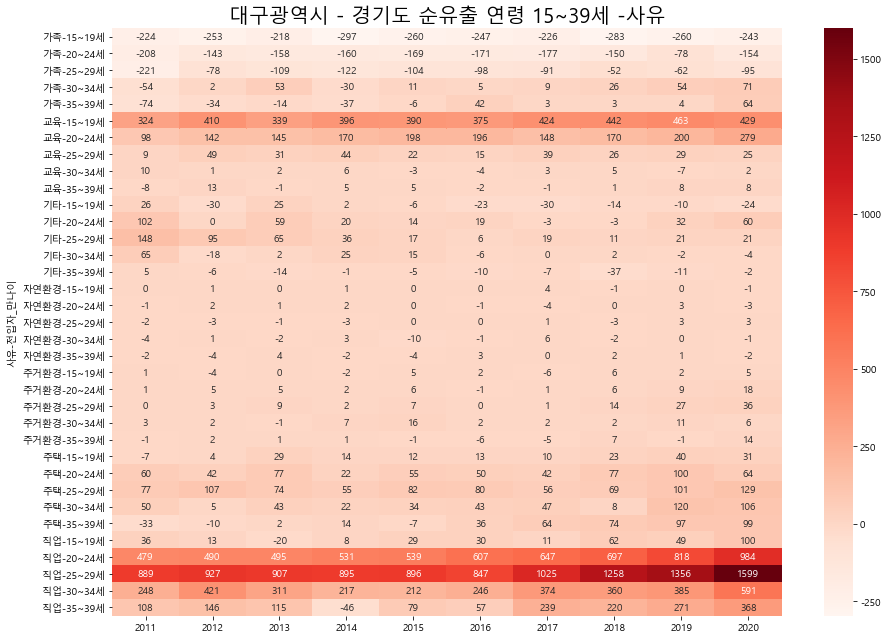

In [2]:
select= "대구광역시"
전출도시 ="경기도"
순유출 = pd.DataFrame()

for year in years:
    #변수 만들기    
    go_to_city_year(select,전출도시,year)
    go_to_city_year(전출도시,select,year)
    a = globals()[f'{전출도시}_to_{select}']
    b = globals()[f'{select}_to_{전출도시}']
    
    con_1 =a["전입자_만나이"] == "15~19세"
    
    con_2 =a["전입자_만나이"] == "20~24세"
    
    con_3 =a["전입자_만나이"] == "25~29세"
    
    con_4 =a["전입자_만나이"] == "30~34세"
    
    con_5 =a["전입자_만나이"] == "35~39세"
    전입 = pd.DataFrame(a[con_1 | con_2| con_3| con_4| con_5].groupby(["사유","전입자_만나이"]).size() )
    
    con_1 =b["전입자_만나이"] == "15~19세"
    
    con_2 =b["전입자_만나이"] == "20~24세"
    
    con_3 =b["전입자_만나이"] == "25~29세"
    
    con_4 =b["전입자_만나이"] == "30~34세"
    
    con_5 =b["전입자_만나이"] == "35~39세"
    전출 = pd.DataFrame(b[con_1 | con_2| con_3| con_4| con_5].groupby(["사유","전입자_만나이"]).size() )
    aa= 전출-전입
    순유출= pd.concat([순유출, aa],axis=1)   
순유출.columns =years
순유출.fillna(0,inplace=True)
순유출.to_csv(f'{select} - {전출도시} 순유출 연령 15~39세 -사유.csv',encoding= 'cp949')

## 그래프
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic',size= 10) 
plt.figure(figsize=(15,12))
sns.heatmap(순유출, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
plt.title(f'{select} - {전출도시} 순유출 연령 15~39세 -사유',size= 20)
plt.gcf().subplots_adjust(bottom=0.20)
    
    

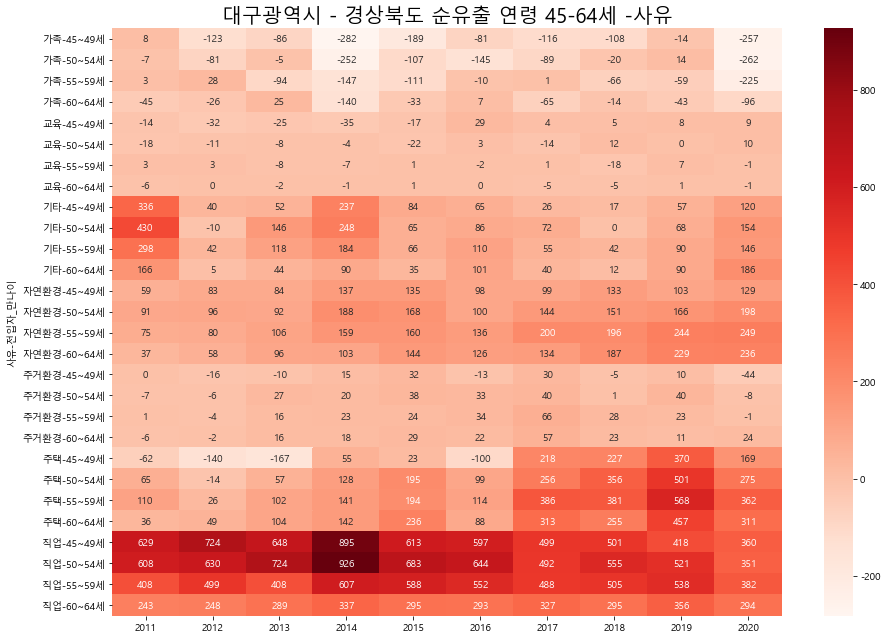

In [3]:
select= "대구광역시"
전출도시 ="경상북도"
순유출 = pd.DataFrame()

for year in years:
    #변수 만들기    
    go_to_city_year(select,전출도시,year)
    go_to_city_year(전출도시,select,year)
    a = globals()[f'{전출도시}_to_{select}']
    b = globals()[f'{select}_to_{전출도시}']
    
    con_1 =a["전입자_만나이"] == "45~49세"
    
    con_2 =a["전입자_만나이"] == "50~54세"
    
    con_3 =a["전입자_만나이"] == "55~59세"
    
    con_4 =a["전입자_만나이"] == "60~64세"
    
    전입 = pd.DataFrame(a[con_1 | con_2| con_3| con_4].groupby(["사유","전입자_만나이"]).size() )
    
    con_1 =b["전입자_만나이"] == "45~49세"
    
    con_2 =b["전입자_만나이"] == "50~54세"
    
    con_3 =b["전입자_만나이"] == "55~59세"
    
    con_4 =b["전입자_만나이"] == "60~64세"
    전출 = pd.DataFrame(b[con_1 | con_2| con_3| con_4].groupby(["사유","전입자_만나이"]).size() )
    aa= 전출-전입
    순유출= pd.concat([순유출, aa],axis=1)   
순유출.columns =years
순유출.fillna(0,inplace=True)
순유출.to_csv(f'{select} - {전출도시} 순유출 연령  -사유.csv',encoding= 'cp949')
## 그래프
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic',size= 10) 
plt.figure(figsize=(15,12))
sns.heatmap(순유출, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
plt.title(f'{select} - {전출도시} 순유출 연령 45-64세 -사유',size= 20)
plt.gcf().subplots_adjust(bottom=0.20)
    

In [4]:
select= "대구광역시"
전출도시 ="경상남도"
순유출 = pd.DataFrame()

for year in years:
    #변수 만들기    
    go_to_city_year(select,전출도시,year)
    go_to_city_year(전출도시,select,year)
    a = globals()[f'{전출도시}_to_{select}']
    b = globals()[f'{select}_to_{전출도시}']
    
   
    
    con_2 =a["전입자_만나이"] == "20~24세"
    
   
    
    전입 = pd.DataFrame(a[con_2].groupby(["사유","전입자_만나이"]).size() )
    
  
    
    con_2 =b["전입자_만나이"] == "20~24세"
 
    전출 = pd.DataFrame(b[con_2].groupby(["사유","전입자_만나이"]).size() )
    aa= 전출-전입
    순유출= pd.concat([순유출, aa],axis=1)   
순유출.columns =years
순유출.fillna(0,inplace=True)
순유출.to_csv(f'{select} - {전출도시} 순유출 연령  -사유.csv',encoding= 'cp949')
    

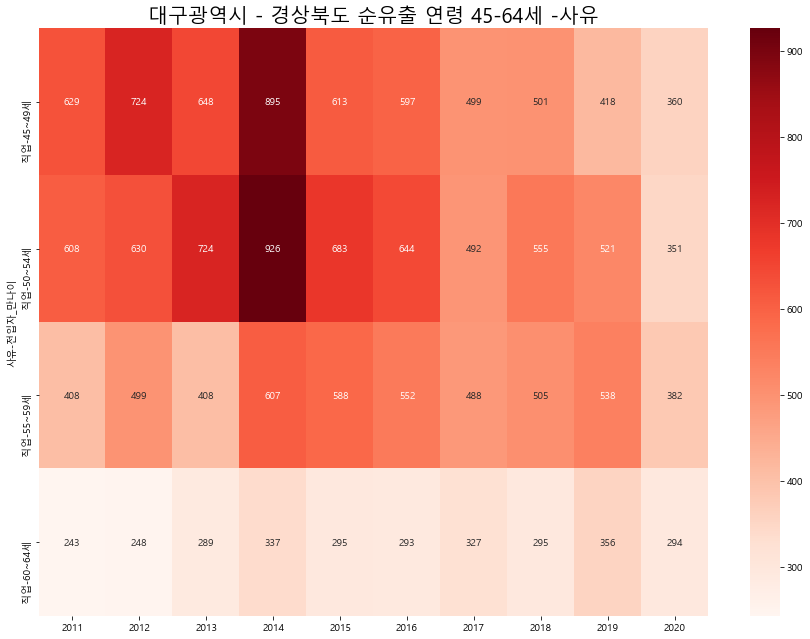

In [5]:
select= "대구광역시"
전출도시 ="경상북도"
reason_is="직업"

순유출 = pd.DataFrame()

for year in years:
    #변수 만들기    
    go_to_city_year(select,전출도시,year)
    go_to_city_year(전출도시,select,year)
    a = globals()[f'{전출도시}_to_{select}']
    b = globals()[f'{select}_to_{전출도시}']
    
    con_1 =a["전입자_만나이"] == "45~49세"
    
    con_2 =a["전입자_만나이"] == "50~54세"
    
    con_3 =a["전입자_만나이"] == "55~59세"
    
    con_4 =a["전입자_만나이"] == "60~64세"
    con_6 =a["사유"] == reason_is
    
    전입 = pd.DataFrame(a[con_6 & (con_1 | con_2| con_3| con_4)].groupby(["사유","전입자_만나이"]).size() )
    
    con_1 =b["전입자_만나이"] == "45~49세"
    
    con_2 =b["전입자_만나이"] == "50~54세"
    
    con_3 =b["전입자_만나이"] == "55~59세"
    
    con_4 =b["전입자_만나이"] == "60~64세"
    con_6 =b["사유"] == reason_is
    
    전출 = pd.DataFrame(b[con_6 & (con_1 | con_2| con_3| con_4)].groupby(["사유","전입자_만나이"]).size() )
    
    aa= 전출-전입
    순유출= pd.concat([순유출, aa],axis=1)   
순유출.columns =years
순유출.fillna(0,inplace=True)
순유출.to_csv(f'{select} - {전출도시} 순유출 연령  -사유.csv',encoding= 'cp949')
## 그래프
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic',size= 10) 
plt.figure(figsize=(15,12))
sns.heatmap(순유출, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
plt.title(f'{select} - {전출도시} 순유출 연령 45-64세 -사유',size= 20)
plt.gcf().subplots_adjust(bottom=0.20)

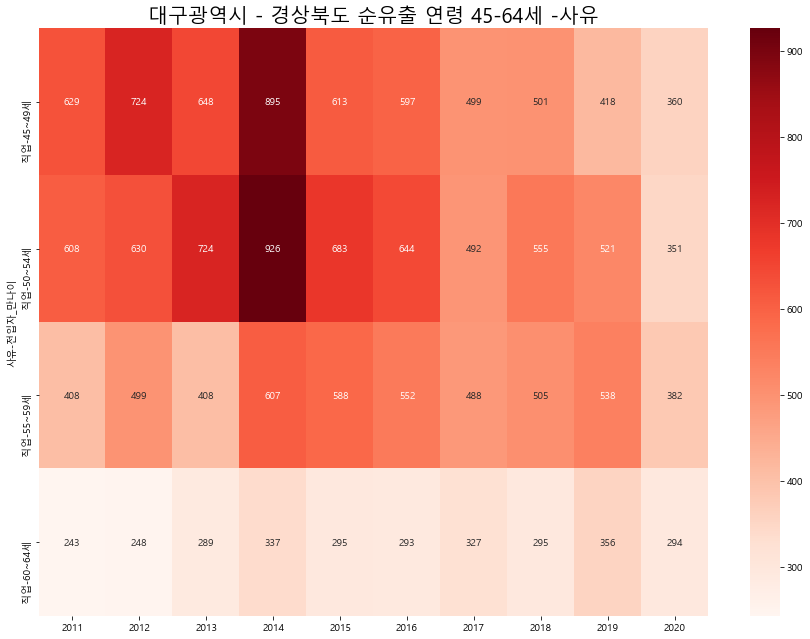

In [6]:
select= "대구광역시"
전출도시 ="경상북도"
reason_is="직업"
순유출 = pd.DataFrame()

for year in years:
    #변수 만들기    
    go_to_city_year(select,전출도시,year)
    go_to_city_year(전출도시,select,year)
    a = globals()[f'{전출도시}_to_{select}']
    b = globals()[f'{select}_to_{전출도시}']
    
    con_1 =a["전입자_만나이"] == "45~49세"
    
    con_2 =a["전입자_만나이"] == "50~54세"
    
    con_3 =a["전입자_만나이"] == "55~59세"
    
    con_4 =a["전입자_만나이"] == "60~64세"
    con_6 =a["사유"] == reason_is
    
    전입 = pd.DataFrame(a[con_6 & (con_1 | con_2| con_3| con_4)].groupby(["사유","전입자_만나이"]).size() )
    
    con_1 =b["전입자_만나이"] == "45~49세"
    
    con_2 =b["전입자_만나이"] == "50~54세"
    
    con_3 =b["전입자_만나이"] == "55~59세"
    
    con_4 =b["전입자_만나이"] == "60~64세"
    con_6 =b["사유"] == reason_is
    
    전출 = pd.DataFrame(b[con_6 & (con_1 | con_2| con_3| con_4)].groupby(["사유","전입자_만나이"]).size() )
    
    aa= 전출-전입
    순유출= pd.concat([순유출, aa],axis=1)   
순유출.columns =years
순유출.fillna(0,inplace=True)
순유출.to_csv(f'{select} - {전출도시} 순유출 연령  -사유.csv',encoding= 'cp949')
## 그래프
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic',size= 10) 
plt.figure(figsize=(15,12))
sns.heatmap(순유출, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
plt.title(f'{select} - {전출도시} 순유출 연령 45-64세 -사유',size= 20)
plt.gcf().subplots_adjust(bottom=0.20)

In [7]:
#함수만들기 단서

select= "대구광역시"
전출도시 ="서울특별시"
reason_is = "가족"
순유출 = pd.DataFrame()
age_is = "15~19" or "20~24세" or "25~29세" or "30~34세" or "35~39세"
for year in years:
    #변수 만들기    
    go_to_city_year(select,전출도시,year)
    go_to_city_year(전출도시,select,year)
    a = globals()[f'{전출도시}_to_{select}']
    b = globals()[f'{select}_to_{전출도시}']
    
    con_1 =a["전입자_만나이"] == age_is
    con_2 =a["사유"] == reason_is
    전입 = pd.DataFrame(a[con_2 & con_1].groupby(["사유","전입자_만나이"]).size() )
    
    con_1 =b["전입자_만나이"] == age_is
    con_2 =b["사유"] == reason_is
    전출 = pd.DataFrame(b[con_2 & con_1].groupby(["사유","전입자_만나이"]).size() )
    
    
    aa= 전출-전입
    순유출= pd.concat([순유출, aa],axis=1)   
순유출.columns =years
순유출.fillna(0,inplace=True)
순유출.to_csv(f'{select} - {전출도시} 순유출 연령  -{reason_is}.csv',encoding= 'cp949')

## 그래프
# plt.rcParams['axes.unicode_minus'] = False
# plt.rc('font', family='Malgun Gothic',size= 10) 
# plt.figure(figsize=(15,12))
# sns.heatmap(순유출, linewidths =0, annot=True,fmt=".0f",cmap = cmap)
# plt.title(f'{select} - {전출도시} 순유출 연령 15~39세 -사유',size= 20)
# plt.gcf().subplots_adjust(bottom=0.20)
    
    

In [8]:
select= "대구광역시"
전출도시 ="경상남도"
순유출 = pd.DataFrame()

for year in years:
    #변수 만들기    
    go_to_city_year(select,전출도시,year)
    go_to_city_year(전출도시,select,year)
    a = globals()[f'{전출도시}_to_{select}']
    b = globals()[f'{select}_to_{전출도시}']
    
   
    
    con_2 =a["전입자_만나이"] == "20~24세"
    
   
    
    전입 = pd.DataFrame(a[con_2].groupby(["사유","전입자_만나이"]).size() )
    
  
    
    con_2 =b["전입자_만나이"] == "20~24세"
 
    전출 = pd.DataFrame(b[con_2].groupby(["사유","전입자_만나이"]).size() )
    aa= 전출-전입
    순유출= pd.concat([순유출, aa],axis=1)   
순유출.columns =years
순유출.fillna(0,inplace=True)
순유출.to_csv(f'{select} - {전출도시} 순유출 20-24세 .csv',encoding= 'cp949')

In [9]:
# # # 실행
# 도시명 ={"서울특별시", "대구광역시", "부산광역시", "인천광역시", "광주광역시", "대전광역시", "울산광역시",
#                         "경기도", "강원도", "충청북도", "충청남도", "전라북도", "전라남도", "경상북도", "경상남도", "제주특별자치도"}

# print("")
# print("################################################################ \n")    
# print("프로그램 시작\n")
# print("################################################################ \n")        
# print("도시를 선택하세요.\n")
# print("(도시예시 : 서울특별시, 대구광역시, 부산광역시, 인천광역시, 광주광역시, 대전광역시, 울산광역시, \n\
#                 경기도, 강원도, 충청북도, 충청남도, 전라북도, 전라남도, 경상북도, 경상남도, 제주특별자치도)\n")
# Select_City= input("도시 선택 : ")
# print("****************************************************************")
# if Select_City not in 도시명:
#     print("잘못된 도시명을 입력하셨습니다.")
    
# print('연도를 입력하세요.\n')
# print(f' 선택가능 년도 : 전체기간 또는 {years}')
# select_year= input("연도선택 : ")
# if select_year != "전체기간" :
#     if(int(select_year) not in years) :
#         print("잘못된 년도를 입력하셨습니다.")
        
#         print("****************************************************************")
# if(select_year == "전체기간"):
#     make_df2()  
#     a="예"
#     while 1:    
#         if a != "예":
#             break
#         plt.rcParams['axes.unicode_minus'] = False
#         plt.rcParams['figure.figsize'] =  [15, 10]
#         plt.rc('font',family='Malgun Gothic', size=12)
#         all_in_graph()
#         all_out_graph()
#         all_move_graph()
#         print("그래프 저장완료")
        
#         while 1: 
#             print("")
#             print("****************************************************************")
#             a= input("도시간 비교를 하시겠습니까?   [예  - 입력시 도시간 비교 / 원하지 않을 시 아무 키나 입력] ")
#             if a == "예":
#                 print("")
#                 print("도시를 선택하세요.\n")
#                 print("(도시예시 : 서울특별시, 대구광역시, 부산광역시, 인천광역시, 광주광역시, 대전광역시, 울산광역시, \n\
#                 경기도, 강원도, 충청북도, 충청남도, 전라북도, 전라남도, 경상북도, 경상남도, 제주특별자치도)\n")
#                 bb_ci= input("비교 도시 선택 : ")
#                 if bb_ci not in 도시명:
#                     print("잘못된 도시명을 입력하셨습니다. ")
                    
#                 go_to_city_all(Select_City,bb_ci)
#                 g_a_in_b_all(Select_City,bb_ci)
#                 g_a_out_b_all(Select_City,bb_ci)
#                 g_a_move_b_all(Select_City,bb_ci)
#                 print("그래프 저장완료")
#             else:
#                 break
# elif  (1980<=int(select_year)<=2030):
#     make_df1(select_year)  
#     plt.rcParams['axes.unicode_minus'] = False
#     plt.rc('font', family='Malgun Gothic',size=20 ) 
#     plt.rcParams['figure.figsize'] =  [10, 10]
#     in_graph(select_year)
#     out_graph(select_year)
#     move_graph(select_year)
#     print("그래프 저장완료")
    
#     while 1: 
#         print("")
#         print("****************************************************************")
#         a= input("세부 비교를 하시겠습니까?   [예  - 입력시 세부 비교 / 원하지 않을 시 아무 키나 입력] ")
#         if a != "예":
#             break  
#         print("")
#         select_세부= input(f"세부 항목입력 : 도시/사유/연령 ")
#         print("")
#         print("****************************************************************")
        
#         if (select_세부 == "도시"):
#             print("")
#             print("도시를 선택하세요")
#             print("(도시예시 : 서울특별시, 대구광역시, 부산광역시, 인천광역시, 광주광역시, 대전광역시, 울산광역시, \n\
#                 경기도, 강원도, 충청북도, 충청남도, 전라북도, 전라남도, 경상북도, 경상남도, 제주특별자치도)\n")
#             a= input(f"세부 도시 입력:  ")
            
#             if a not in 도시명:
#                 print("잘못된 도시명을 입력하셨습니다.")
#             if (Select_City == a ) :#내부이동 구현아직 x
#                 go_to_city_year(Select_City,a,select_year)
#                 in_graph_city(select_year,a)    
#                 move_graph_city(select_year,a)    
#                 g_a_move_b(Select_City,a,select_year)
#                 print("그래프 저장완료")
                
#             else:
#                 go_to_city_year(Select_City,a,select_year)
#                 go_to_city_year(a,Select_City,select_year)
#                 in_graph_city(select_year,a)    
#                 out_graph_city(select_year,a)    
#                 move_graph_city(select_year,a)    
#                 g_a_move_b(Select_City,a,select_year)  
#                 print("그래프 저장완료")
                    
#         elif (select_세부 == "사유"):
#             print("")
#             print("사유를 선택하세요")
#             print("(사유 목록 : '직업','가족','주택','교육','주거환경','자연환경','기타")
#             b= input("사유 입력: ")
#             if b not in 사유:
#                 print("잘못된 사유명을 입력하셨습니다.")
#             in_graph_reason(select_year,b)
#             out_graph_reason(select_year,b)
#             move_graph_reason(select_year,b)     
#             print("그래프 저장완료")
            
#         elif (select_세부 == "연령"):
#             print("")
#             print("연령대를 선택하세요")
#             print("(연령대 목록 : '0~4세','5~9세','10~14세','15~19세','20~24세','25~29세','30~34세','35~39세','40~44세','45~49세',\n\
#                     '50~54세','55~59세','60~64세','65~69세','70~74세','75~79세','80세 이상'\n\ ")
#             c= input(f"세부 연령대 입력: ")
#             if c not in 연령:
#                 print("잘못된 연령대를 입력하셨습니다.")
#             in_graph_age(select_year,c)    
#             out_graph_age(select_year,c)    
#             move_graph_age(select_year,c) 
#             print("그래프 저장완료")
# else:
#     print("잘못된 기간을 입력하셨습니다.")
